In [1]:
from society.agent import Agent, TrainableAgent
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.selection.greedy import (
    GreedySelectionStrategy,
    EGreedySelectionStrategy,
)
from society.strategies.selection.random import RandomSelectionStrategy
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.environment import SelectionEnvironment
from society.visualisation.network import *

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
POPULATION = 5

agents = [
    Agent(GreedySelectionStrategy(), AllC()),
    Agent(GreedySelectionStrategy(), AllD()),
    Agent(GreedySelectionStrategy(), RandomGameplayStrategy()),
    Agent(GreedySelectionStrategy(), TitForTat()),
]

agent = TrainableAgent(QLearningSelectionStrategy(5), TitForTat())
agent.selection_strategy._epsilon = 0.2

env = SelectionEnvironment(agent, agents)

state = env.reset()

done = False

rewards = []
losses = []

for _ in range(100000):
    action = agent.select_partner(state)

    old_state = state
    state, reward, done = env.step(action)

    agent.update_selector(old_state, state, reward)

    rewards.append(reward)
    losses.append(agent.selection_strategy._loss / agent.selection_strategy._count)

    if done:
        state = env.reset()

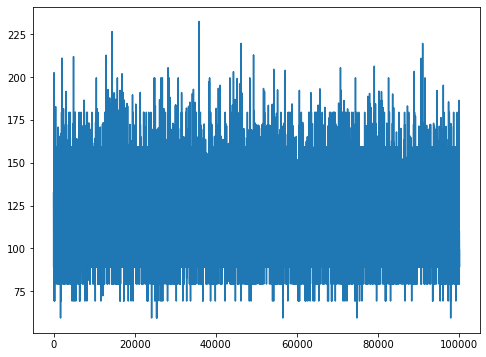

In [3]:
plt.plot(np.convolve(rewards, np.ones(10) / 10, mode="valid"))

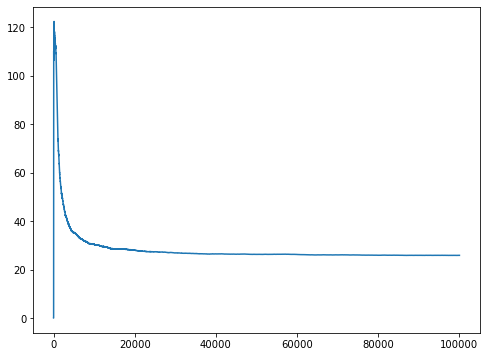

In [4]:
plt.plot(losses)